# LCFit Specified time around max using python (`pycoco`)
---
## Aim

To fit just around peak, as the dominant feature in some of our objects are the long tails. 

In [1]:
# %matplotlib inline
%matplotlib notebook

try:
    from importlib import reload
except:
    pass

from __future__ import print_function ## Force python3-like printing

from matplotlib import pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

import os
import sys
import numpy as np
from astropy.table import Table, vstack

import pycoco as pcc

reload(pcc) ## FOR DEV
reload(pcc.defaults)
reload(pcc.functions)

import pyCoCo as pccsims

In [2]:
# filter_path = "/Users/berto/Code/CoCo/data/filters"
# coco_root_path = "/Users/berto/Code/CoCo"
coco_root_path = os.environ["COCO_ROOT_DIR"]
filter_path = os.path.join(coco_root_path, "data/filters")

coco = pccsims.pyCoCo(pcc.utils.b(filter_path), pcc.utils.b(coco_root_path))

inputs:

* **`snname`**
* **`redshift`**
* **`absmag offset`**
* **`EBV MW`**
* **`EBV Host`**
* **`Rv`**
* **`MJD at Peak`**

* **`MJD to simulate`**
* **`filters to simulate`**

In [3]:
sn = pcc.SNClass("SN2013ge")
print(sn.name)
sn.load_phot( path = os.path.join(coco_root_path, 'data/lc/' + sn.name + '.dat'))
sn.load_list(os.path.join(coco_root_path,"lists/" + sn.name + ".list"))
sn.load_spec()
# sn.check_overlaps()
sn.get_lcfit(os.path.join(coco_root_path, "recon/" + sn.name + ".dat"))

SN2013ge
/Users/berto/Code/CoCo/data/lc/SN2013ge.dat


In [4]:
sn.plot_lc()

<IPython.core.display.Javascript object>

## Find the band with the best data
---
What metric to use...
 
 - Epochs?
 - S/N 

In [5]:
verbose=True

for band in sn.phot.data:
    if verbose: print(band)
    length = len(sn.phot.data[band])
    print(length)

BessellB
53
BessellV
61
SDSS_r
57
BessellR
12
SDSS_i
55
BessellI
12


In [6]:
master_list = pcc.utils.make_master_list(pcc._default_list_dir_path)

In [7]:
for i, list_file in enumerate(master_list):
    list_path = os.path.join(pcc._default_list_dir_path, list_file)
    
    pcc.utils.check_file_path(list_path)
    
    print(i, list_path)
    if i == 0:
        master_list_table = pcc.read_list_file(list_path)
    else:
        master_list_table = vstack([master_list_table, pcc.read_list_file(list_path)])

0 /Users/berto/Code/CoCo/lists/iPTF13bvn.list
1 /Users/berto/Code/CoCo/lists/SN1993J.list
2 /Users/berto/Code/CoCo/lists/SN1994I.list
3 /Users/berto/Code/CoCo/lists/SN1996cb.list
4 /Users/berto/Code/CoCo/lists/SN1998bw.list
5 /Users/berto/Code/CoCo/lists/SN1999dn.list
6 /Users/berto/Code/CoCo/lists/SN2002ap.list
7 /Users/berto/Code/CoCo/lists/SN2003jd.list
8 /Users/berto/Code/CoCo/lists/SN2004aw.list
9 /Users/berto/Code/CoCo/lists/SN2005bf.list
10 /Users/berto/Code/CoCo/lists/SN2005hg.list
11 /Users/berto/Code/CoCo/lists/SN2006aj.list
12 /Users/berto/Code/CoCo/lists/SN2007C.list
13 /Users/berto/Code/CoCo/lists/SN2007gr.list
14 /Users/berto/Code/CoCo/lists/SN2007uy.list
15 /Users/berto/Code/CoCo/lists/SN2007Y.list
16 /Users/berto/Code/CoCo/lists/SN2008ax.list
17 /Users/berto/Code/CoCo/lists/SN2008bo.list
18 /Users/berto/Code/CoCo/lists/SN2008D.list
19 /Users/berto/Code/CoCo/lists/SN2009bb.list
20 /Users/berto/Code/CoCo/lists/SN2009er.list
21 /Users/berto/Code/CoCo/lists/SN2009iz.list
22

In [8]:
list_df = master_list_table.to_pandas()

In [9]:
def guess_phase(item, specfiletype=".txt", verbose=False):
    filename = item.split("/")[-1]
    filename = filename.split("_")[1:][0]
    filename = filename.strip(specfiletype)
    print(filename)
    try:
        phase = float(filename)
    except:
        phase = np.nan
        pass
    return phase

In [10]:
list_df["phase"] = list_df["spec_path"].map(guess_phase)

-15.73
-14.73
-13.74
-12.74
-10.75
-8.76
-7.77
-6.77
-5.77
-4.78
-1.79
1.19
8.16
20.11
34.05
-11.0
-3.0
0.0
2.0
3.0
5.0
16.0
19.0
28.0
31.0
35.0
37.0
40.0
47.0
-6.29
-5.29
-4.29
-3.3
-2.3
-1.3
-0.3
0.7
1.7
2.7
5.69
8.69
10.68
20.67
21.67
22.67
23.66
24.66
25.66
27.66
28.66
29.66
31.65
32.65
33.65
35.65
36.65
37.64
39.64
54.62
55.62
-16.46
-15.46
-0.5
2.49
6.48
7.48
8.48
9.48
28.43
30.43
34.42
38.41
42.4
-8.63
-7.64
-4.66
-3.67
-2.68
-0.69
1.29
2.28
4.26
7.24
9.22
10.21
11.2
17.15
20.13
27.07
42.94
49.88
-7.93
-3.96
-0.99
1.98
4.95
10.9
11.89
15.85
18.82
39.63
-8.08
-7.08
-6.09
-5.09
-2.1
-1.1
-0.1
0.9
1.9
2.89
3.89
4.89
5.89
6.88
8.88
11.87
12.87
15.87
17.86
18.86
25.84
26.84
29.83
30.83
-3.14
-2.16
-1.18
-0.2
0.79
3.73
14.53
17.47
18.45
19.43
20.42
21.4
23.36
26.31
27.29
28.27
33.18
45.94
46.92
47.9
48.88
-5.61
-3.64
-2.66
-1.67
-0.69
0.3
1.28
2.26
3.25
4.23
11.12
17.03
18.01
20.97
21.95
23.92
25.89
29.83
30.81
39.67
45.58
47.54
-20.22
-9.42
-7.46
-6.48
-5.5
-4.51
-3.53
-2.55
-0.59
0.

In [11]:
list_df

,spec_path,snname,mjd_obs,z,phase
0,data/spec/iPTF13bvn/iPTF13bvn_-15.73.txt,iPTF13bvn,56460.07,0.00449,-15.73
1,data/spec/iPTF13bvn/iPTF13bvn_-14.73.txt,iPTF13bvn,56461.07,0.00449,-14.73
2,data/spec/iPTF13bvn/iPTF13bvn_-13.74.txt,iPTF13bvn,56462.06,0.00449,-13.74
3,data/spec/iPTF13bvn/iPTF13bvn_-12.74.txt,iPTF13bvn,56463.06,0.00449,-12.74
4,data/spec/iPTF13bvn/iPTF13bvn_-10.75.txt,iPTF13bvn,56465.05,0.00449,-10.75
5,data/spec/iPTF13bvn/iPTF13bvn_-8.76.txt,iPTF13bvn,56467.04,0.00449,-8.76
6,data/spec/iPTF13bvn/iPTF13bvn_-7.77.txt,iPTF13bvn,56468.03,0.00449,-7.77
7,data/spec/iPTF13bvn/iPTF13bvn_-6.77.txt,iPTF13bvn,56469.03,0.00449,-6.77
8,data/spec/iPTF13bvn/iPTF13bvn_-5.77.txt,iPTF13bvn,56470.03,0.00449,-5.77
9,data/spec/iPTF13bvn/iPTF13bvn_-4.78.txt,iPTF13bvn,56471.02,0.00449,-4.78


In [12]:
def run_LCfit(path, coco_dir = pcc._default_coco_dir_path, verbose = True,):
    """
    Parameters
    ----------
    Returns
    -------
    """
    check_file_path(path)
    relist() ## Check filter file is up to date

    if verbose: print("Running CoCo lcfit on " + path)
    cwd = os.getcwd()
    os.chdir(coco_dir)
    subprocess.call([os.path.join(_default_coco_dir_path, "lcfit"), path])
    os.chdir(cwd)
    if verbose: print("Fit complete")
    pass

In [13]:
# phot_obj, mjdmax = False, fitphase_min = -50, fitphase_max = 50

# if not mjdmax:
    


# if not os.path.isdir(os.path.join(pcc._default_data_dir_path, "lc_trim")):
#     print("Directory not found, creating")
#     os.mkdir(os.path.join(pcc._default_data_dir_path, "lc_trim"))

<IPython.core.display.Javascript object>


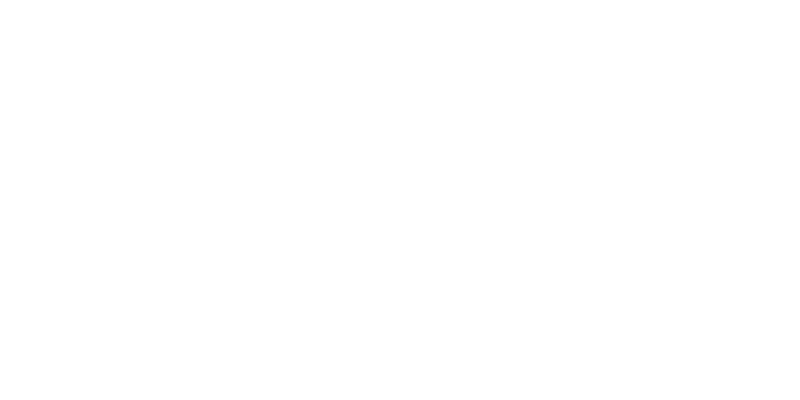

In [14]:
snpath = os.path.join(pcc._default_data_dir_path, "lc/SN2013ge.dat")

phot_obj = pcc.PhotometryClass()
phot_obj.load(snpath)
phot_obj.plot()

In [15]:
phot_obj.phot

MJD,flux,flux_err,filter
d,erg / (Angstrom cm2 s),erg / (Angstrom cm2 s),
float64,float64,float64,str8
56608.5,1.23481e-15,1.36476e-16,BessellR
56608.5,7.90679e-16,1.52931e-16,BessellI
56608.5,2.1717e-15,1.60017e-16,BessellV
56615.5,2.95938e-15,8.17705e-17,SDSS_r
56615.5,2.03986e-15,7.51512e-17,SDSS_i
56618.5,3.01717e-15,1.11157e-16,BessellR
56618.5,2.02302e-15,7.45308e-17,BessellI
56618.5,4.29339e-15,1.58174e-16,BessellV


In [16]:
phot_obj._phot_format_for_save()

MJD,flux,flux_err,filter
d,erg / (Angstrom cm2 s),erg / (Angstrom cm2 s),
float64,float64,float64,str8
56608.5,1.23481e-15,1.36476e-16,BessellR
56608.5,7.90679e-16,1.52931e-16,BessellI
56608.5,2.1717e-15,1.60017e-16,BessellV
56615.5,2.95938e-15,8.17705e-17,SDSS_r
56615.5,2.03986e-15,7.51512e-17,SDSS_i
56618.5,3.01717e-15,1.11157e-16,BessellR
56618.5,2.02302e-15,7.45308e-17,BessellI
56618.5,4.29339e-15,1.58174e-16,BessellV


In [17]:
mjdmax = 56620
fitphase_min = -50
fitphase_max = 50

phot = phot_obj.phot
fitmjd_min = mjdmax + fitphase_min
fitmjd_max = mjdmax + fitphase_max

w = np.bitwise_and(phot["MJD"] > fitmjd_min , phot["MJD"] < fitmjd_max)


In [18]:
trimphot = pcc.PhotometryClass()

trimphot.load_table(phot[w])
trimphot.unpack()

In [19]:
filename="SN2013ge.dat" 
trimphot.save(filename, path=os.path.join(pcc._default_data_dir_path, "lc_trim"), squash=True)

has data
/Users/berto/Code/CoCo/data/lc_trim/SN2013ge.dat
Overwriting /Users/berto/Code/CoCo/data/lc_trim/SN2013ge.dat


/Users/berto/Code/verbose-enigma/pycoco/classes.py:772: UserWarning: Found existing file matching /Users/berto/Code/CoCo/data/lc_trim/SN2013ge.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + outpath + ". Run with squash = True to overwrite")


In [20]:
T = trimphot._phot_format_for_save()